# Pandas - Earnings

### Description
a cross-section from 1988-1989 <br>

number of observations : 4266 <br>

observation : individuals <br>

country : United States <br>

### Format
A dataframe containing :

age <br>
age groups, a factor with levels (g1,g2,g3) <br>
23-26,  27-29,  30-32

y <br>
average annual earnings, in 1982 US dollars

In [201]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import *
import scipy
import random
import dataframe_image as dfi
import statsmodels.api as sm

In [168]:
df = pd.read_csv("C:/Users/mateu/Desktop/Semestr 4/Statystyka stosowana/Earnings.csv",
                  sep=",",
                  index_col=0)

# df - Data Frame

In [169]:
print(df)

     age        y
1     g3    569.5
2     g3    895.5
3     g3   1111.0
4     g3   1182.0
5     g3   1277.5
...   ..      ...
4262  g1  83769.0
4263  g1  83810.5
4264  g1  83810.5
4265  g1  83810.5
4266  g1  83810.5

[4266 rows x 2 columns]


In [170]:
head = df.head(n=6)   # return the first n rows, default n=5
head

,age,y
1,g3,569.5
2,g3,895.5
3,g3,1111.0
4,g3,1182.0
5,g3,1277.5
6,g3,1384.0


In [299]:
dfi.export(head, "head.png", table_conversion="matplotlib", max_rows=6)

In [172]:
df1 = df.loc[df["age"]=="g1"]
print(df1)

     age        y
3158  g1    332.5
3159  g1    857.5
3160  g1   1208.0
3161  g1   1366.0
3162  g1   1662.5
...   ..      ...
4262  g1  83769.0
4263  g1  83810.5
4264  g1  83810.5
4265  g1  83810.5
4266  g1  83810.5

[1109 rows x 2 columns]


In [173]:
df2 = df.loc[df["age"]=="g2"]
df3 = df.loc[df["age"]=="g3"]

In [298]:
##### zasada Pareto, zasada 20/80
(sum(df1["y"].loc[df1.index > 887]) + sum(df2["y"].loc[df2.index > 1342]) + sum(df3["y"].loc[df3.index > 1184])) / sum(df["y"])

0.7659427281419152

<AxesSubplot:ylabel='y'>

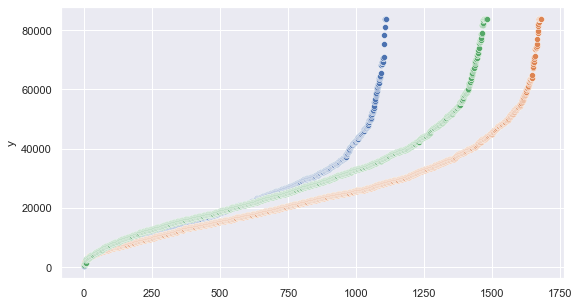

In [289]:
sns.scatterplot(x=np.arange(1,1110), y=df1["y"])
sns.scatterplot(x=np.arange(1,1679), y=df2["y"])
sns.scatterplot(x=np.arange(1,1480), y=df3["y"])

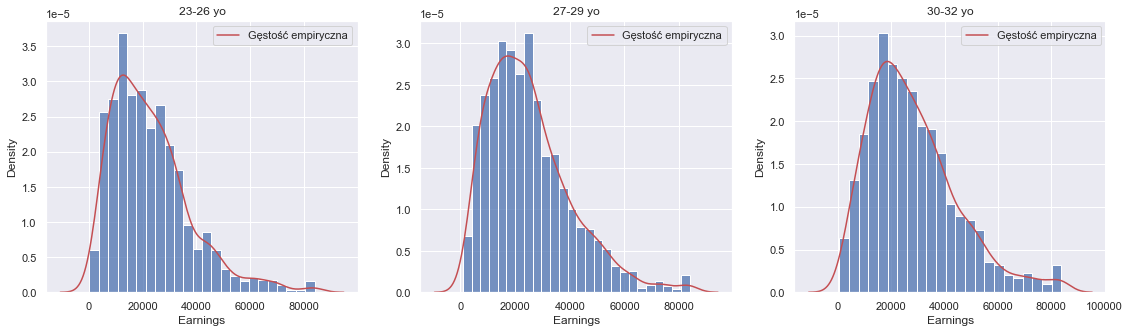

In [192]:
sns.set(rc={"figure.figsize": (19, 5)})
subplot(1,3,1)
sns.histplot(df1["y"], stat="density").set(title="23-26 yo")
sns.kdeplot(df1["y"], color="r", label="Gęstość empiryczna")
plt.xlabel("Earnings")
plt.legend()

subplot(1,3,2)
sns.histplot(df2["y"], stat="density").set(title="27-29 yo")
sns.kdeplot(df2["y"], color="r", label="Gęstość empiryczna")
plt.xlabel("Earnings")
plt.legend()

subplot(1,3,3)
sns.histplot(df3["y"], stat="density").set(title="30-32 yo")
sns.kdeplot(df3["y"], color="r", label="Gęstość empiryczna")
plt.xlabel("Earnings")
plt.legend()


plt.savefig("histogramy1.pdf", format="pdf", bbox_inches="tight")

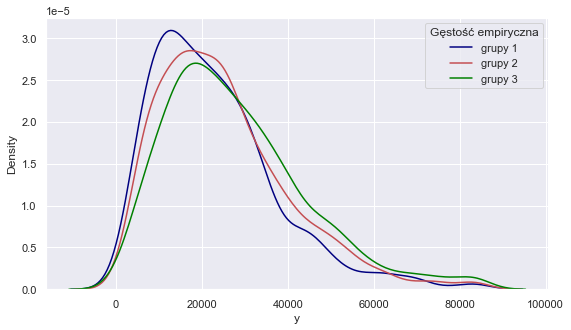

In [184]:
sns.set(rc={"figure.figsize": (9, 5)})

sns.kdeplot(df1["y"], color="navy", label="grupy 1")
sns.kdeplot(df2["y"], color="r", label="grupy 2")
sns.kdeplot(df3["y"], color="green", label="grupy 3")

plt.legend(title="Gęstość empiryczna")
plt.savefig("gęstości1.pdf", format="pdf", bbox_inches="tight")

[Text(0.5, 1.0, '30-32 yo')]

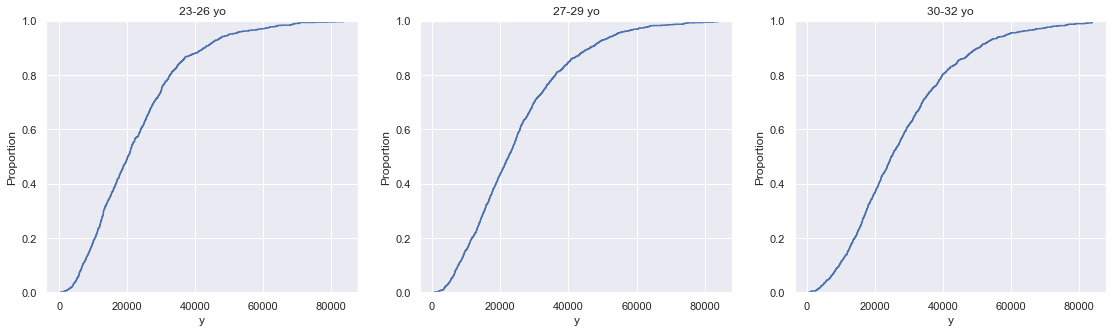

In [185]:
sns.set(rc={"figure.figsize": (19, 5)})
subplot(1,3,1)
sns.ecdfplot(df1["y"]).set(title="23-26 yo")

subplot(1,3,2)
sns.ecdfplot(df2["y"]).set(title="27-29 yo")


subplot(1,3,3)
sns.ecdfplot(df3["y"]).set(title="30-32 yo")

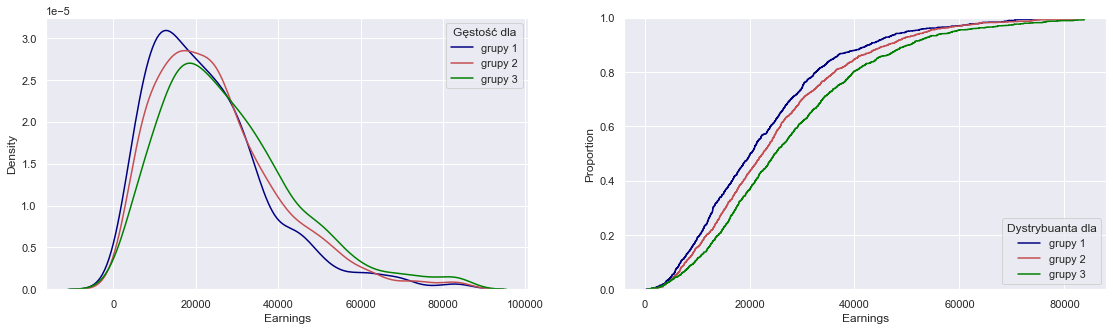

In [193]:
sns.set(rc={"figure.figsize": (19, 5)})

subplot(1,2,1)
sns.kdeplot(df1["y"], color="navy", label="grupy 1")
sns.kdeplot(df2["y"], color="r", label="grupy 2")
sns.kdeplot(df3["y"], color="green", label="grupy 3")

plt.xlabel("Earnings")
plt.legend(title="Gęstość dla", loc="upper right")


subplot(1,2,2)
sns.ecdfplot(df1["y"], color="navy", label="grupy 1")
sns.ecdfplot(df2["y"], color="r", label="grupy 2")
sns.ecdfplot(df3["y"], color="green", label="grupy 3")

plt.xlabel("Earnings")
plt.legend(title="Dystrybuanta dla", loc="lower right")
plt.savefig("gd1.pdf", format="pdf", bbox_inches="tight")

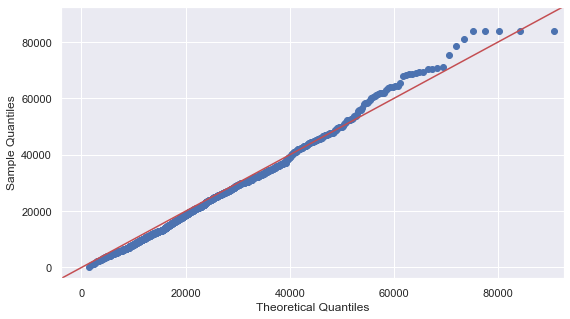

In [277]:
sns.set(rc={"figure.figsize": (9, 5)})
sm.qqplot(df1["y"], dist=scipy.stats.gamma(3,0,8000), line='45');

plt.savefig("qqplot1.pdf", format="pdf", bbox_inches="tight")

In [239]:
d1 = df1.describe().rename(columns={"y":"Earnings in group 1"})
d1

,Earnings in group 1
count,1109.000000
mean,22880.475654
std,14667.586946
min,332.500000
25%,12040.500000
50%,20151.000000
75%,30161.500000
max,83810.500000


In [100]:
d2 = df2.describe().rename(columns={"y":"Earnings in group 2"})
d2

,Earnings in group 2
count,1678.000000
mean,25080.174017
std,15291.887035
min,886.500000
25%,13831.875000
50%,22584.000000
75%,33115.375000
max,83810.500000


In [102]:
d3 = df3.describe().rename(columns={"y":"Earnings in group 3"})
d3

,Earnings in group 3
count,1479.000000
mean,27973.634550
std,16502.686426
min,569.500000
25%,15995.500000
50%,24909.500000
75%,36838.750000
max,83810.500000


#### 1989 r. w Polsce ~ 480 dolarów na rok 

### Harmonic mean

In [46]:
hmean1 = scipy.stats.hmean(df1["y"])
hmean1

#df1.describe().append(df1.reindex_axis(df1.describe().columns, 1).agg({'x':hmean,'y':hmean}))

#pd.concat([df1.describe(), pd.DataFrame(df3.hmean(), columns=["harmonic mean"]).T])

13344.302964342663

In [47]:
hmean2 = scipy.stats.hmean(df2["y"])
hmean2

15522.724505439148

In [48]:
hmean3 = scipy.stats.hmean(df3["y"])
hmean3

16880.41976396149

### Geometric mean

In [49]:
gmean1 = scipy.stats.gmean(df1["y"])
gmean1

18364.198963696897

In [50]:
gmean2 = scipy.stats.gmean(df2["y"])
gmean2

20461.67888438298

In [51]:
gmean3 = scipy.stats.gmean(df3["y"])
gmean3

22960.326130252583

In [104]:
d123 = pd.concat([d1,d2,d3], axis=1)
d123

,Earnings in group 1,Earnings in group 2,Earnings in group 3
count,1109.000000,1678.000000,1479.000000
mean,22880.475654,25080.174017,27973.634550
std,14667.586946,15291.887035,16502.686426
min,332.500000,886.500000,569.500000
25%,12040.500000,13831.875000,15995.500000
50%,20151.000000,22584.000000,24909.500000
75%,30161.500000,33115.375000,36838.750000
max,83810.500000,83810.500000,83810.500000


In [140]:
#### tworzysz slownik
data1 = {"harmonic mean":[hmean1,hmean2,hmean3], "geometric mean":[gmean1,gmean2,gmean3]}

### tworzysz ze slownika data frame, transpozycja .T bo chcesz to dodawac jako wiersze
data2 = pd.DataFrame(data1).T

### musisz zrobić rename kolumn zeby mialy takie same nazwy jak w tabelce describe()
data2.columns = ["Earnings in group 1","Earnings in group 2","Earnings in group 3"]

data2

,Earnings in group 1,Earnings in group 2,Earnings in group 3
harmonic mean,13344.302964,15522.724505,16880.419764
geometric mean,18364.198964,20461.678884,22960.326130


In [152]:
### d123 to tabelka describe(), data2 to tabelka wyzej
compared = pd.concat([d123,data2], axis=0)

compared

,Earnings in group 1,Earnings in group 2,Earnings in group 3
count,1109.000000,1678.000000,1479.000000
mean,22880.475654,25080.174017,27973.634550
std,14667.586946,15291.887035,16502.686426
min,332.500000,886.500000,569.500000
25%,12040.500000,13831.875000,15995.500000
50%,20151.000000,22584.000000,24909.500000
75%,30161.500000,33115.375000,36838.750000
max,83810.500000,83810.500000,83810.500000
harmonic mean,13344.302964,15522.724505,16880.419764
geometric mean,18364.198964,20461.678884,22960.326130


In [155]:
dfi.export(compared, "compared.png", table_conversion="matplotlib")

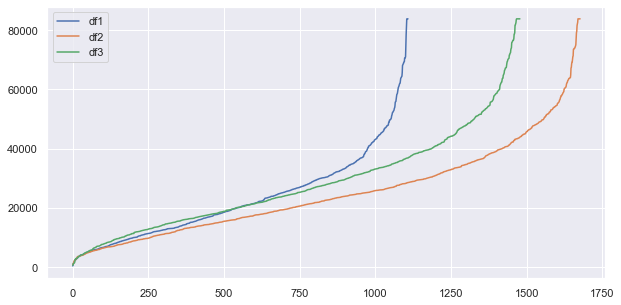

In [17]:
sns.set(rc={"figure.figsize": (10, 5)})
plt.plot(np.arange(0,len(df1["y"])), df1["y"], label="df1")
plt.plot(np.arange(0,len(df2["y"])), df2["y"], label="df2")
plt.plot(np.arange(0,len(df3["y"])), df3["y"], label="df3")
plt.legend()

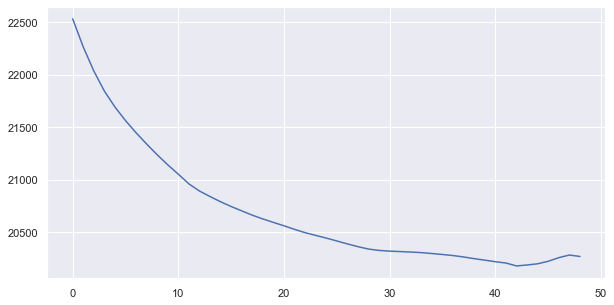

In [52]:
trimmed_mean1 = []

for i in range(1,50):
    trimmed_mean1.append(round(scipy.stats.trim_mean(df1["y"], i/100), 2))
        
plt.plot(trimmed_mean1)

In [195]:
arr1 = scipy.stats.mstats.winsorize(df1["y"], (0.01, 0.02))
arr2 = scipy.stats.mstats.winsorize(df2["y"], (0.01, 0.02))
arr3 = scipy.stats.mstats.winsorize(df3["y"], (0.01, 0.02))

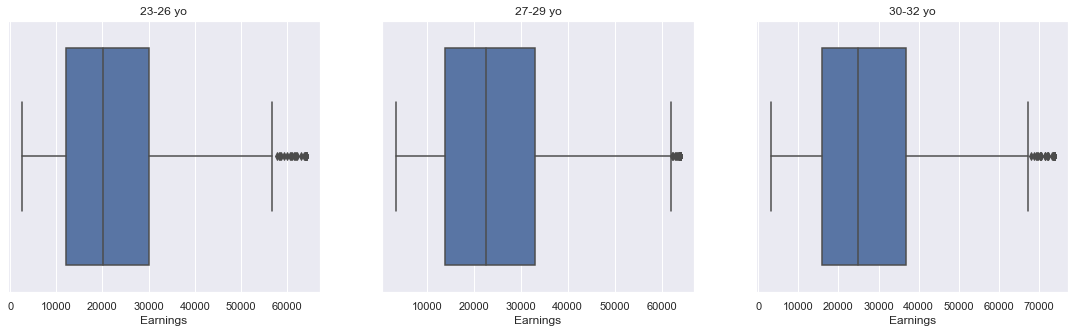

In [199]:
sns.set(rc={"figure.figsize": (19, 5)})

subplot(1,3,1)
sns.boxplot(x = arr1).set(title="23-26 yo")
plt.xlabel("Earnings")

subplot(1,3,2)
sns.boxplot(x = arr2).set(title="27-29 yo")
plt.xlabel("Earnings")

subplot(1,3,3)
sns.boxplot(x = arr3).set(title="30-32 yo")
plt.xlabel("Earnings")

plt.savefig("boxplot1.pdf", format="pdf", bbox_inches="tight")

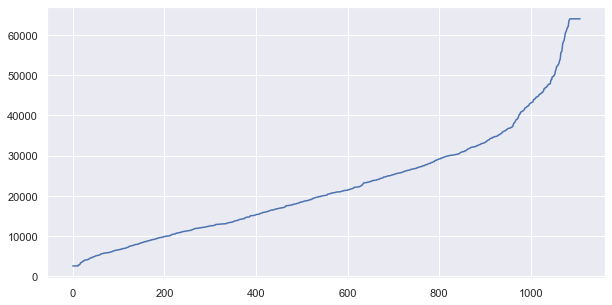

In [36]:
plt.plot(arr1)

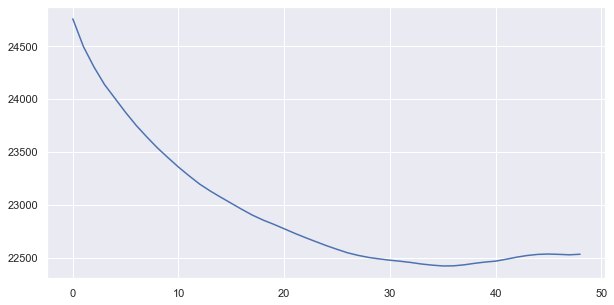

In [53]:
trimmed_mean2 = []

for i in range(1,50):
    trimmed_mean2.append(round(scipy.stats.trim_mean(df2["y"], i/100), 2))
        
plt.plot(trimmed_mean2)

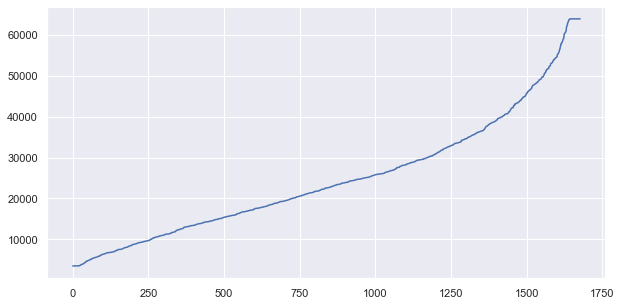

In [39]:
plt.plot(arr2)

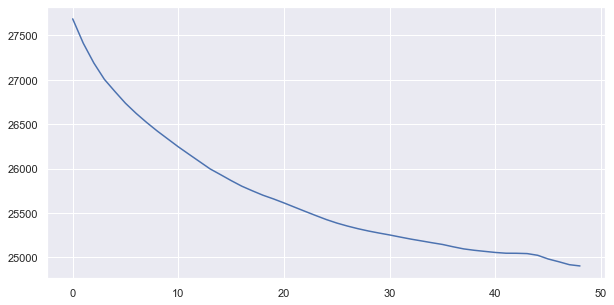

In [54]:
trimmed_mean3 = []

for i in range(1,50):
    trimmed_mean3.append(round(scipy.stats.trim_mean(df3["y"], i/100), 2))
        
plt.plot(trimmed_mean3)

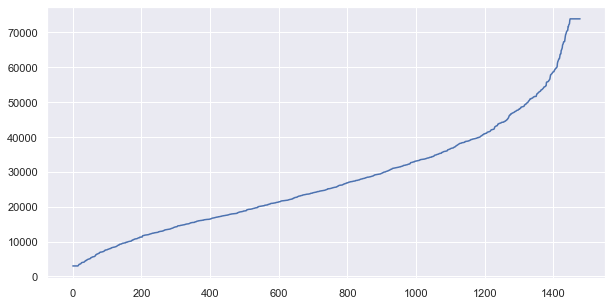

In [41]:
plt.plot(arr3)